# KNN 다중 분류 - IRIS 데이터셋 / Wine 데이터 셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
from sklearnex import patch_sklearn
patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

from sklearn.svm import LinearSVC, SVC

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## #02. IRIS 데이터 셋

### [1] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/iris.xlsx", categories=['Species'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal.Length  150 non-null    float64 
 1   Sepal.Width   150 non-null    float64 
 2   Petal.Length  150 non-null    float64 
 3   Petal.Width   150 non-null    float64 
 4   Species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

데이터프레임 상위 5개 행
+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |             3 |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3

### [2] 데이터 전처리

1. 종속변수 라벨링
3. 훈련/검증 데이터 분리 + 데이터 스케일링

In [3]:
df = my_labelling(origin, 'Species')

x_train, x_test, y_train, y_test = my_train_test_split(df, yname='Species', test_size=0.2, scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## #02. LinearSVC (Linear Support Vector Machine Classification)

### [1] 분류 모델 구현

In [4]:
estimator = LinearSVC(
    penalty='l2',
    C=1, 
    loss='hinge', 
    max_iter=1000, 
    dual=True,
    random_state=0
)

estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  0.925
검증데이터 점수:  0.9666666666666667


### [2] 성능평가

분류 확률을 얻을 수 없기 때문에 `predict_proba()` 메서드가 제공되지 않는다.

그러므로 `roc_curve` 시각화가 불가능하며 `auc`값을 얻을 수 없다

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |        0.925 |     0.966667 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.928342 |     0.952381 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |        0.925 |     0.969697 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| F1 Score          |     0.927618 |     0.958486 | 정밀도와 재현율의 조화평균                                |
+-------------------+--------------+--------------+-----------------------------------------------------------+

[혼동행렬]


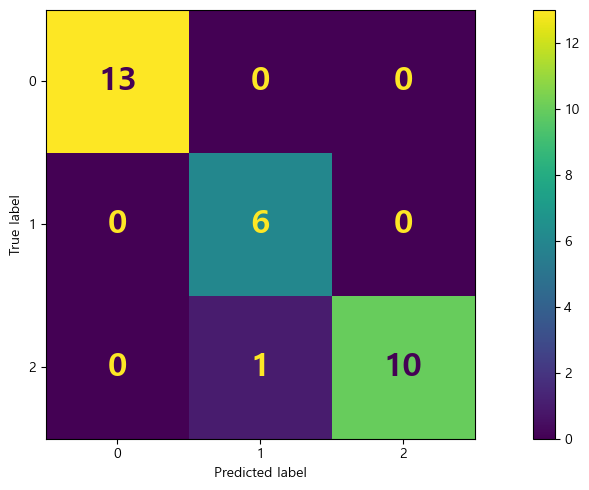


[학습곡선]


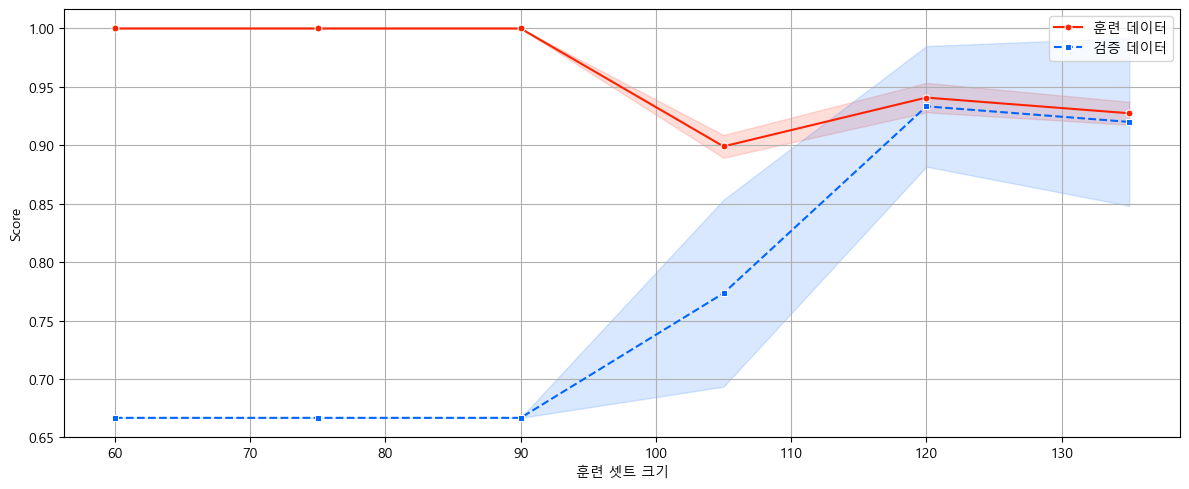

In [5]:
my_classification_result(estimator, x_train, y_train, x_test, y_test)

## 03. SVC 

### [1] 분류 모델 구현

In [6]:
estimator = SVC(
    C=1.0, 
    kernel='rbf', 
    degree=3, 
    gamma='scale', 
    coef0=0.0, 
    shrinking=True, 
    probability=True,   # AUC 값 확인을 위해서는 True로 설정 
    max_iter=-1)

estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  0.9833333333333333
검증데이터 점수:  0.9333333333333333


### [2] 성능평가

분류 확률을 얻을 수 없기 때문에 `predict_proba()` 메서드가 제공되지 않는다.

그러므로 `roc_curve` 시각화가 불가능하며 `auc`값을 얻을 수 없다

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.983333 |     0.933333 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |      0.98374 |     0.914141 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.983333 |     0.914141 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| F1 Score          |     0.983915 |     0.914141 | 정밀도와 재현율의 조화평균                                |
| AUC(ovo)          |     0.999806 |     0.989899 | One vs One에 대한 AUC로, 1에 가까울수록 좋은 모델         |
| AUC(ovr)          |     0.999795 |     0.992181 | One vs Rest에 대한 AUC로, 1에 가까울수록 좋은 모델        |
+-------------------+--------------+--------------+-------------------------------------

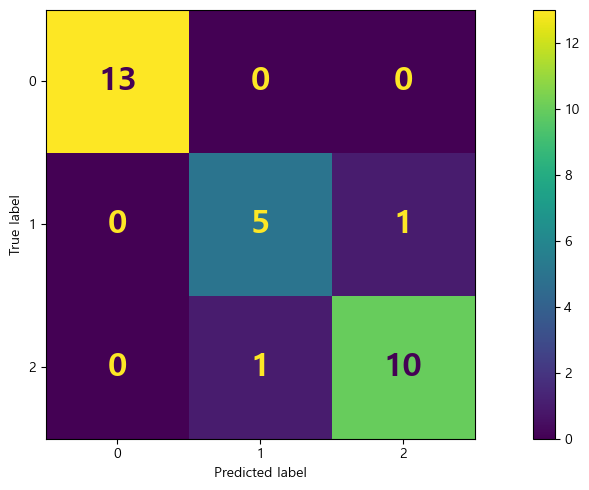


[Roc Curve]


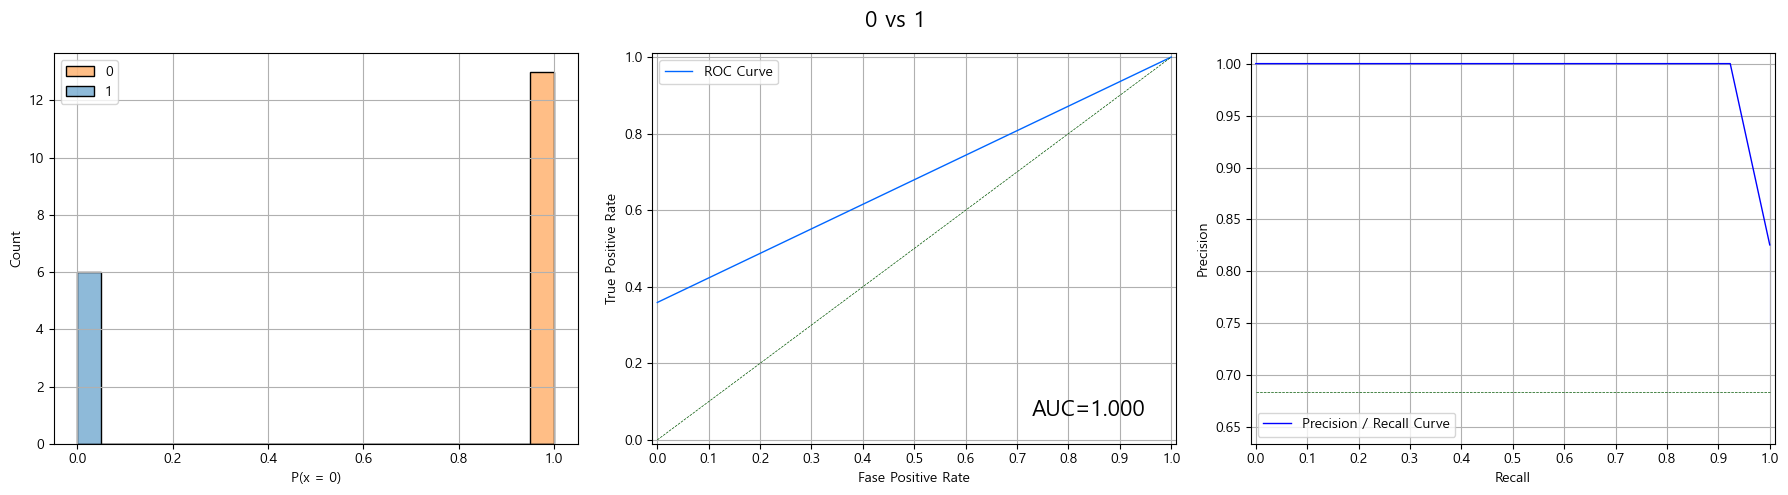

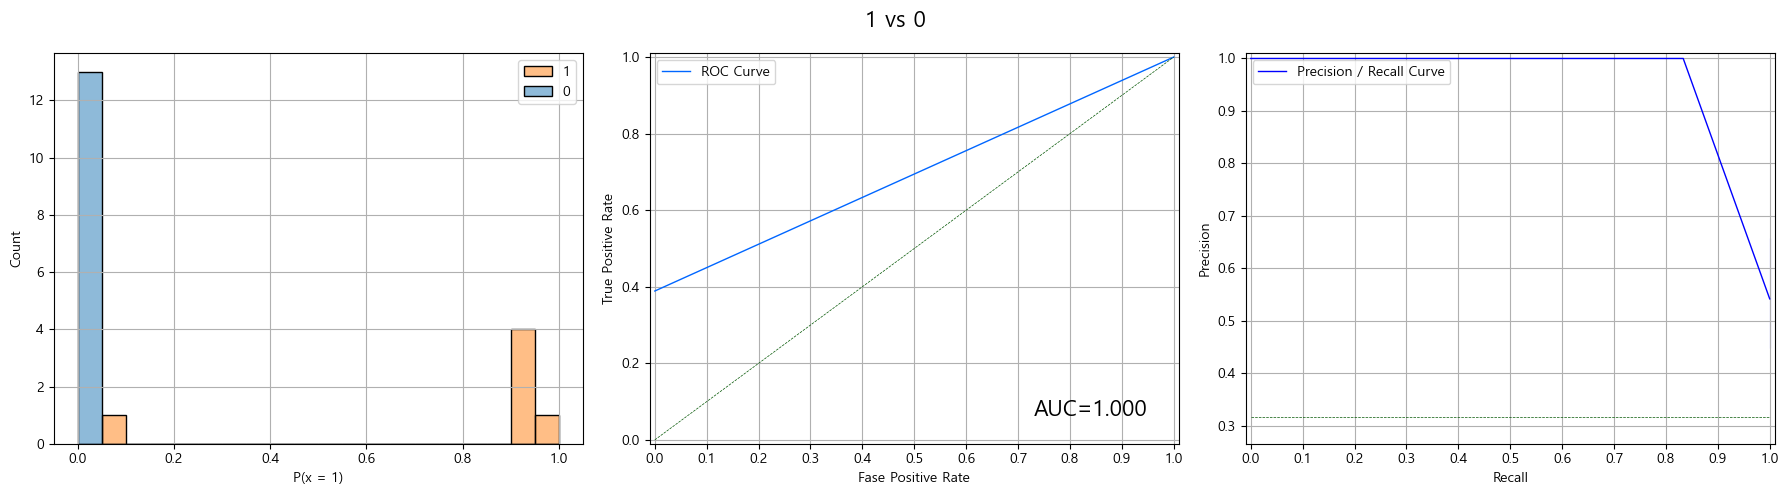

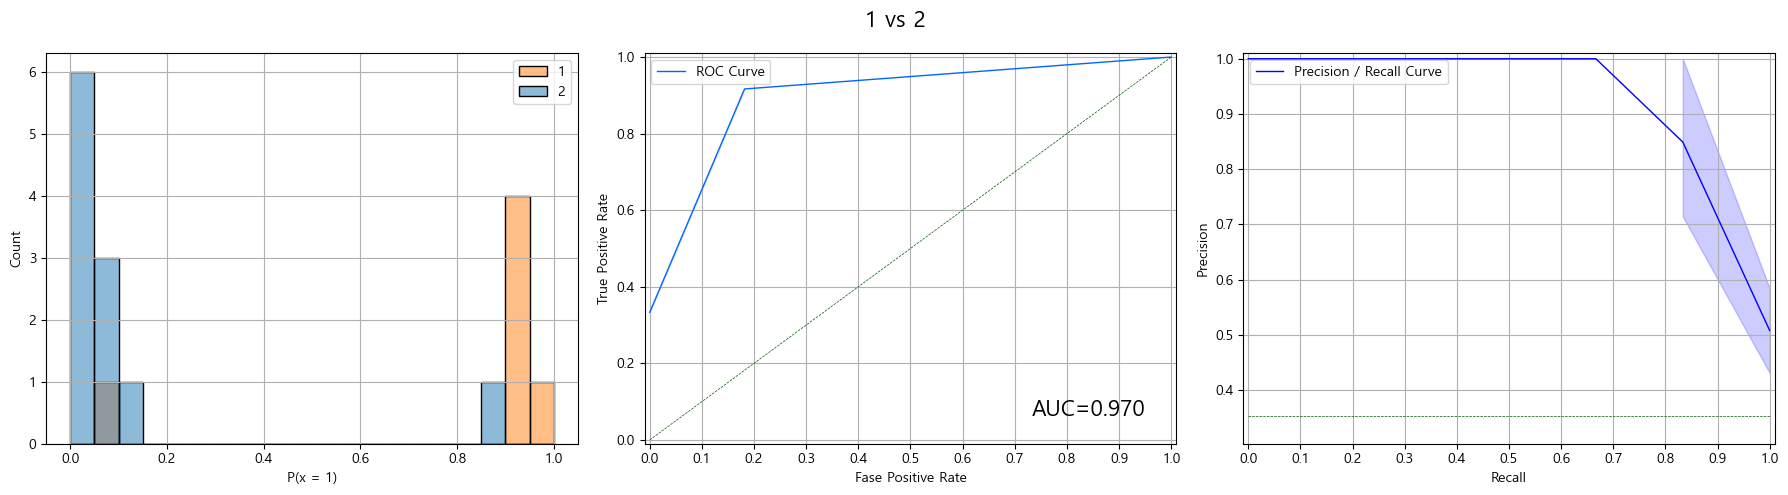

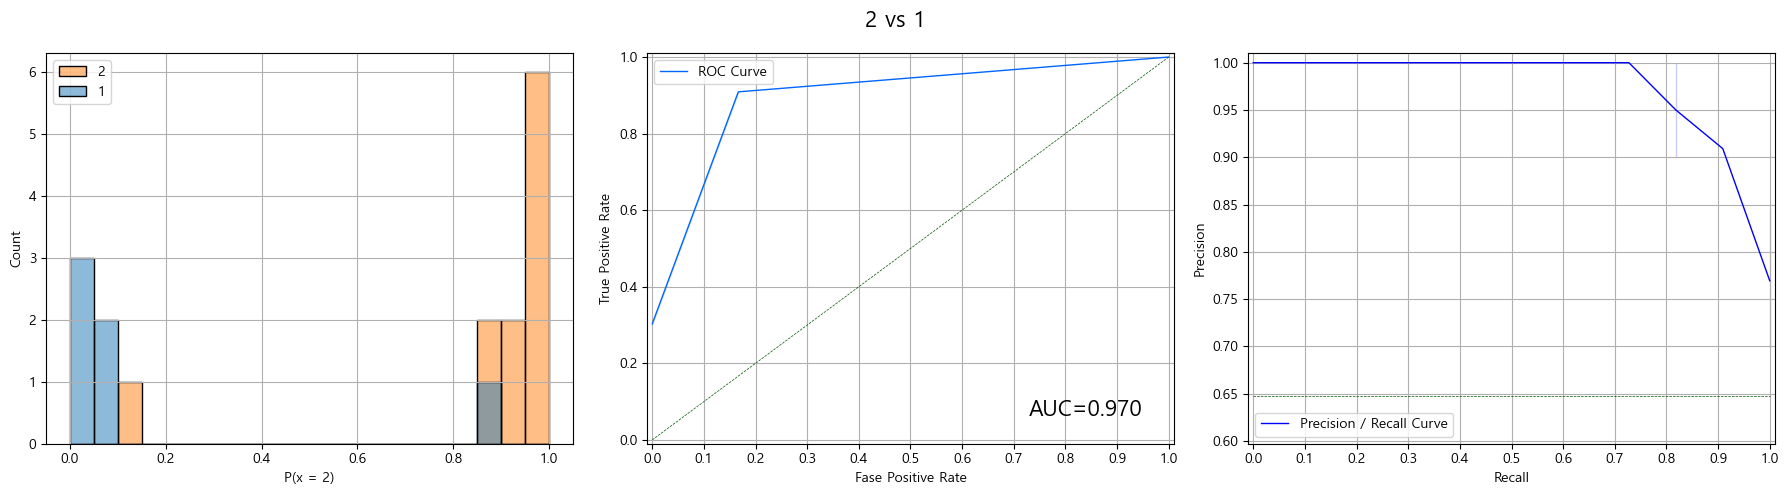

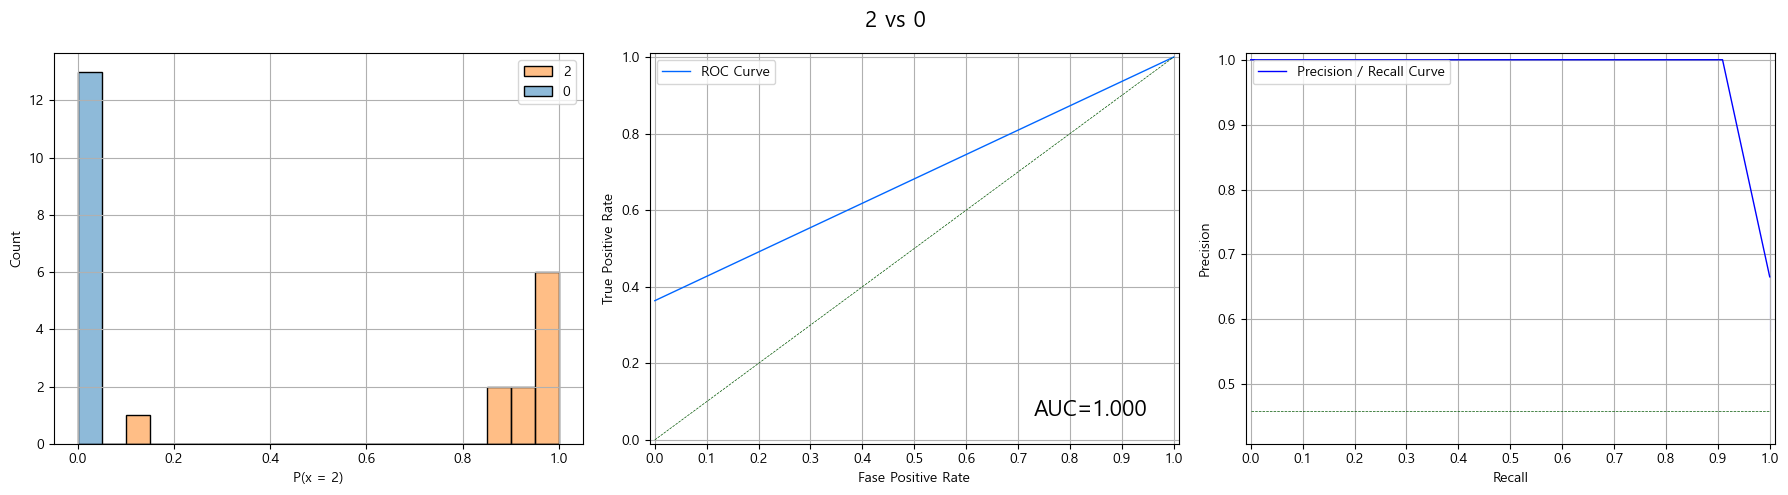

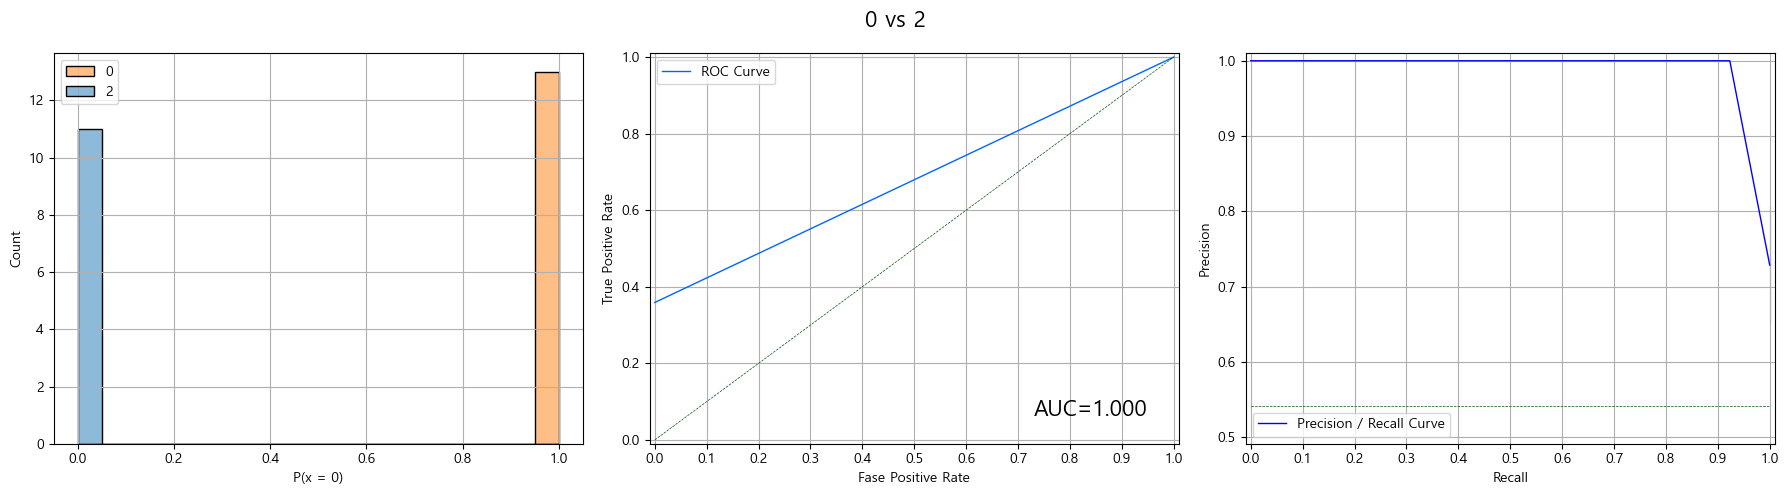

mean roc auc ovo: 0.9899


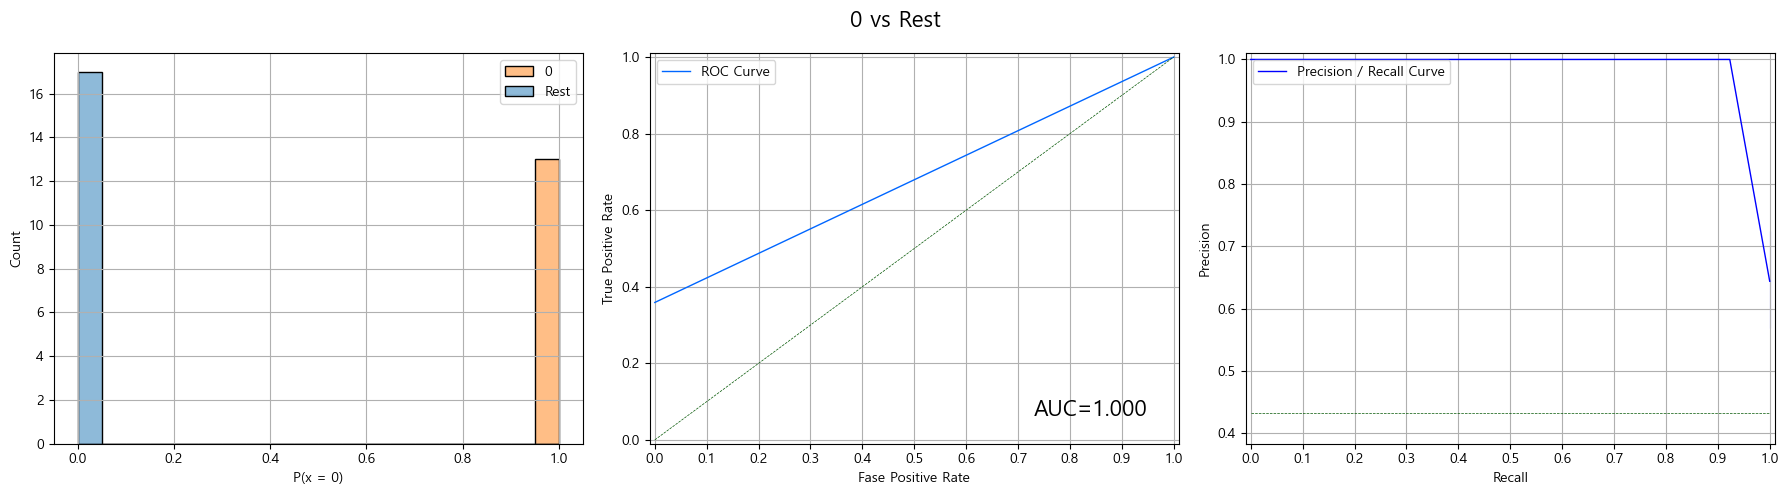

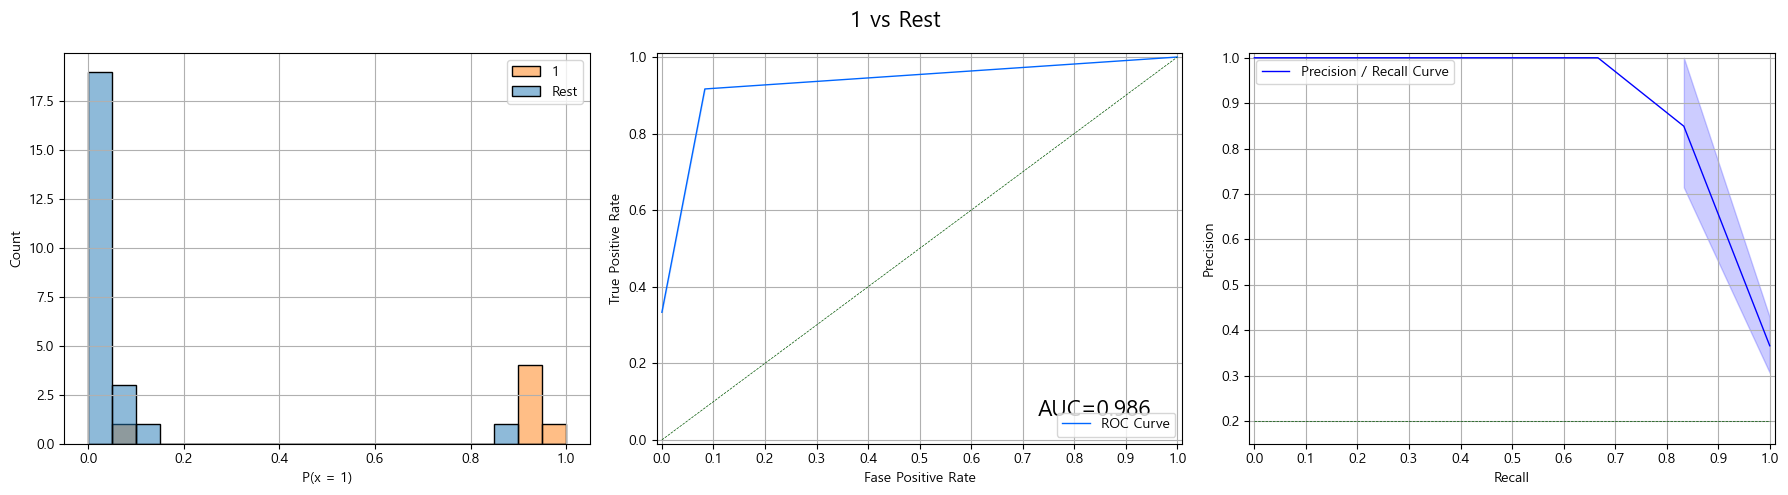

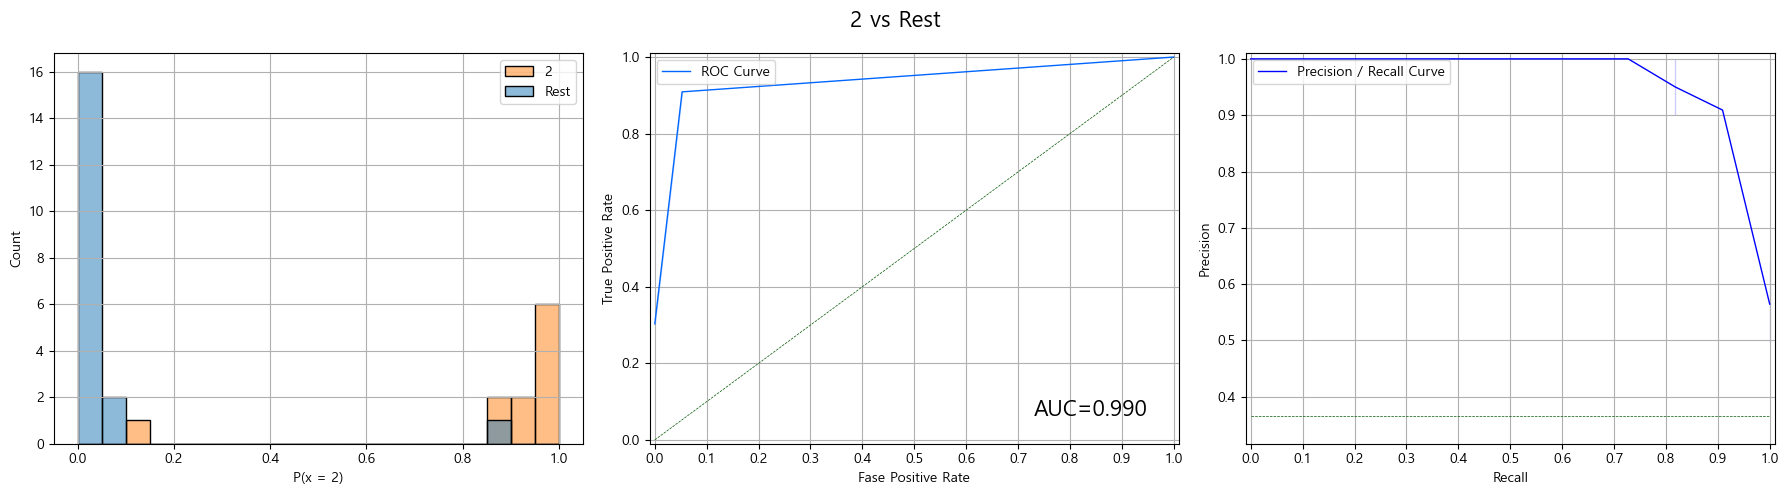

mean roc auc ovo: 0.9922

[학습곡선]


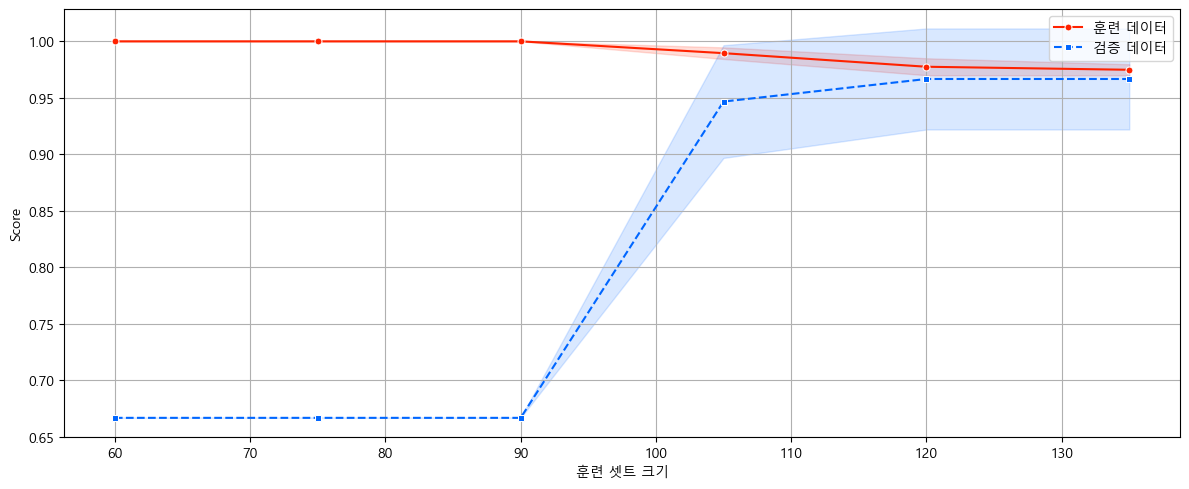

In [7]:
my_classification_result(estimator, x_train, y_train, x_test, y_test)

## #03. Wine 데이터 셋

### [1] 데이터 가져오기

In [8]:
origin = my_read_excel("https://data.hossam.kr/mldata/wine.xlsx", categories=['class'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    int64   
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    int6

### [2] 데이터 전처리

1. 종속변수 타입 변환
2. 훈련/검증 데이터 분할 + 데이터 스케일링

In [9]:
df = origin.copy()
df['class'] = df['class'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df, yname='class', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

## #02. LinearSVC (Linear Support Vector Machine Classification)

### [1] 분류 모델 구현

In [10]:
estimator = LinearSVC(
    penalty='l2',
    C=1, 
    loss='hinge', 
    max_iter=1000, 
    dual=True,
    random_state=0
)

estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  1.0
검증데이터 점수:  0.9722222222222222


### [2] 성능평가

분류 확률을 얻을 수 없기 때문에 `predict_proba()` 메서드가 제공되지 않는다.

그러므로 `roc_curve` 시각화가 불가능하며 `auc`값을 얻을 수 없다

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |     0.972222 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |     0.972222 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |            1 |     0.980392 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| F1 Score          |            1 |     0.975406 | 정밀도와 재현율의 조화평균                                |
+-------------------+--------------+--------------+-----------------------------------------------------------+

[혼동행렬]


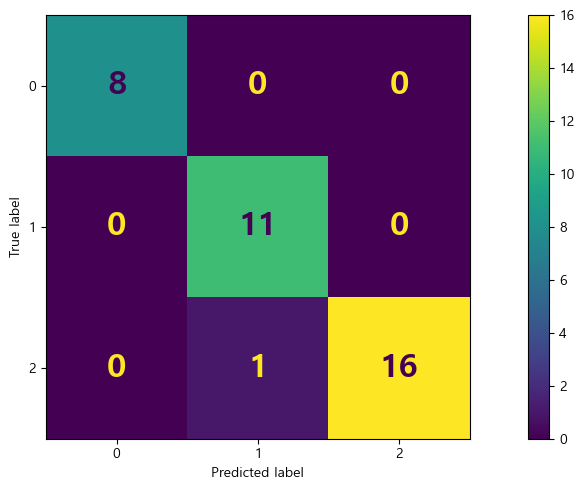


[학습곡선]


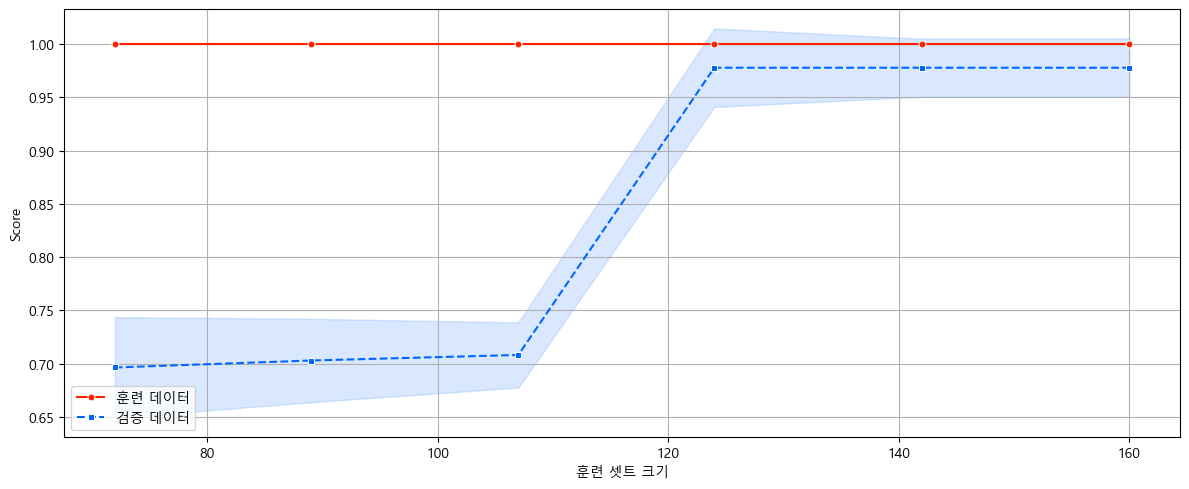

In [11]:
my_classification_result(estimator, x_train, y_train, x_test, y_test)

## 03. SVC 

### [1] 분류 모델 구현

In [12]:
estimator = SVC(
    C=1.0, 
    kernel='rbf', 
    degree=3, 
    gamma='scale', 
    coef0=0.0, 
    shrinking=True, 
    probability=True,   # AUC 값 확인을 위해서는 True로 설정 
    max_iter=-1)

estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  1.0
검증데이터 점수:  0.9722222222222222


### [2] 성능평가

분류 확률을 얻을 수 없기 때문에 `predict_proba()` 메서드가 제공되지 않는다.

그러므로 `roc_curve` 시각화가 불가능하며 `auc`값을 얻을 수 없다

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |     0.972222 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |     0.972222 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |            1 |     0.980392 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| F1 Score          |            1 |     0.975406 | 정밀도와 재현율의 조화평균                                |
| AUC(ovo)          |            1 |            1 | One vs One에 대한 AUC로, 1에 가까울수록 좋은 모델         |
| AUC(ovr)          |            1 |            1 | One vs Rest에 대한 AUC로, 1에 가까울수록 좋은 모델        |
+-------------------+--------------+--------------+-------------------------------------

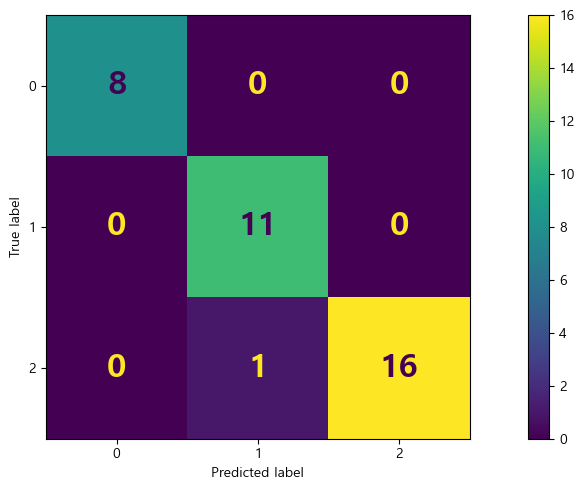


[Roc Curve]


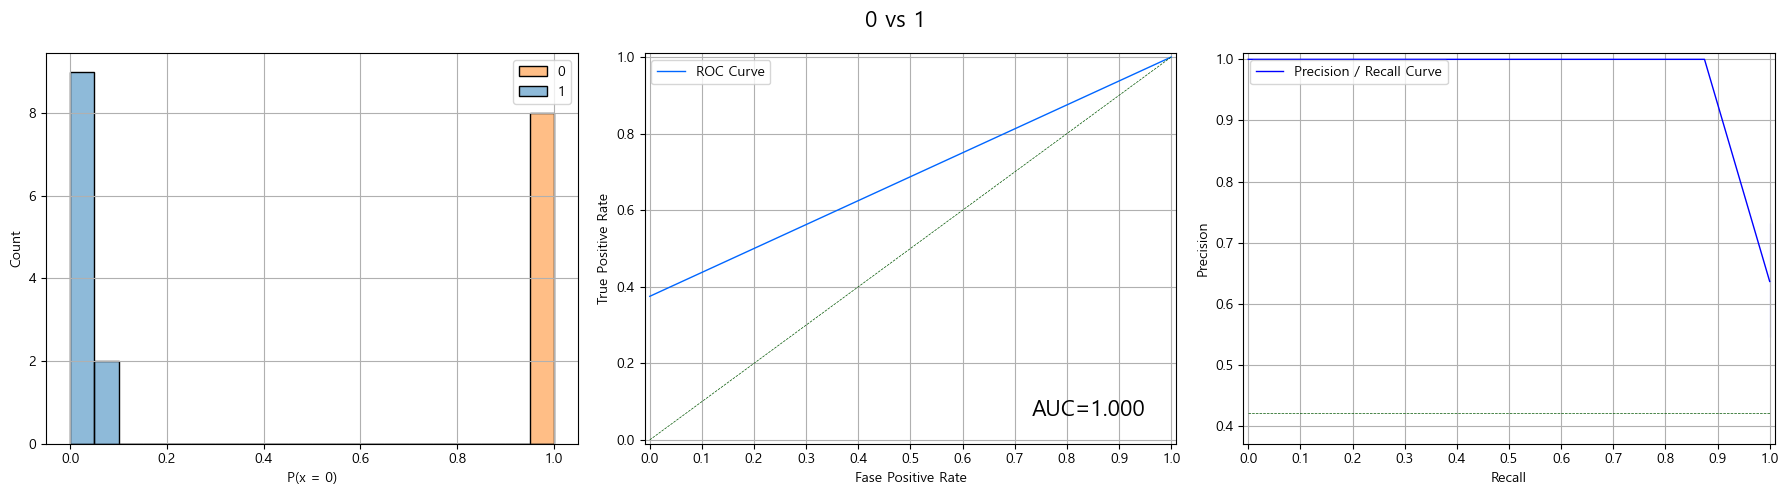

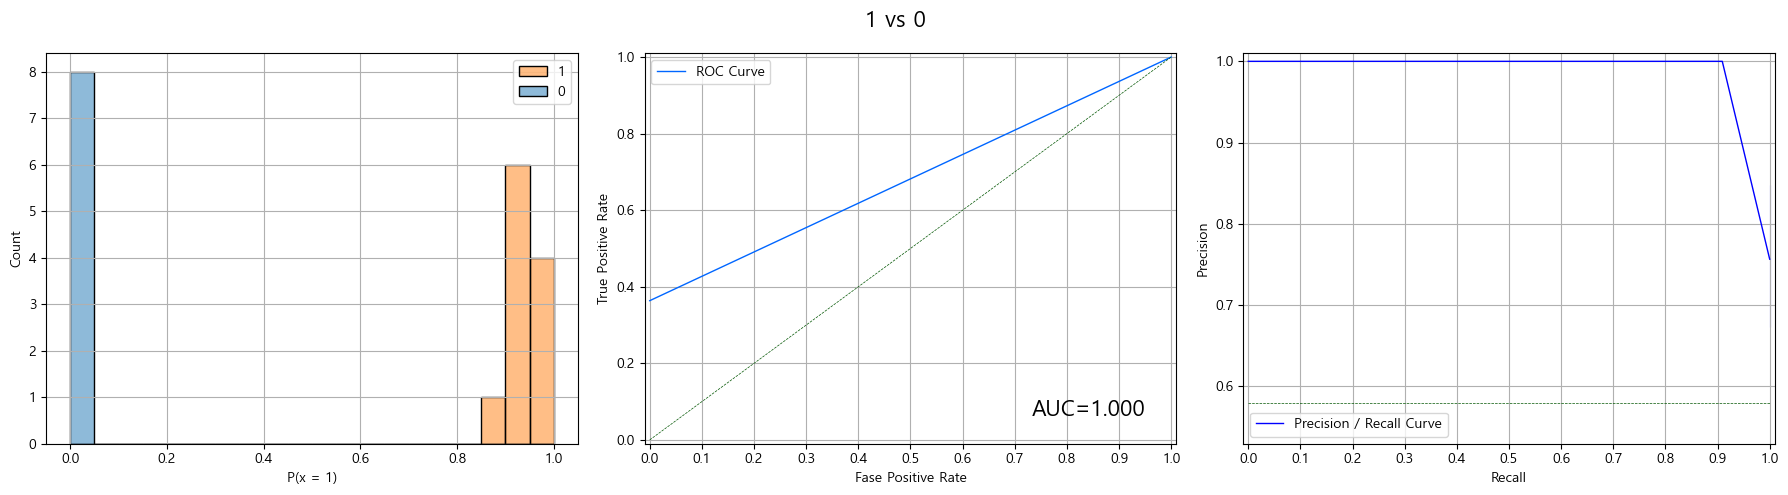

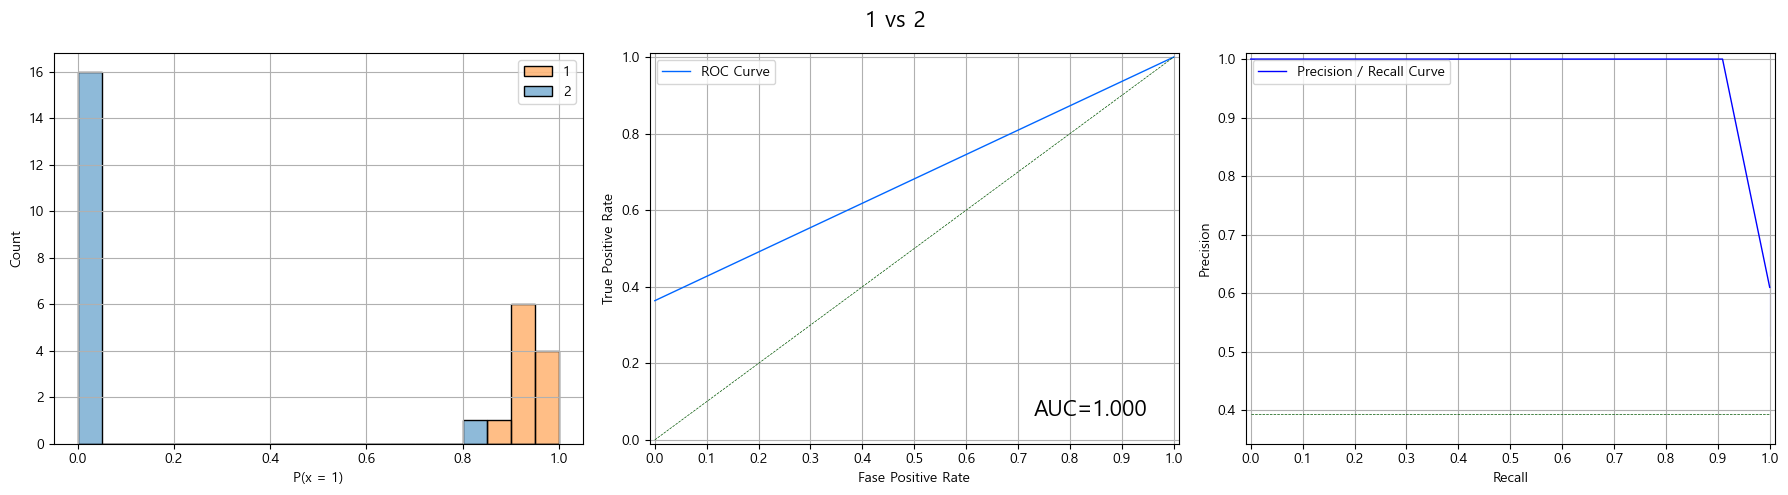

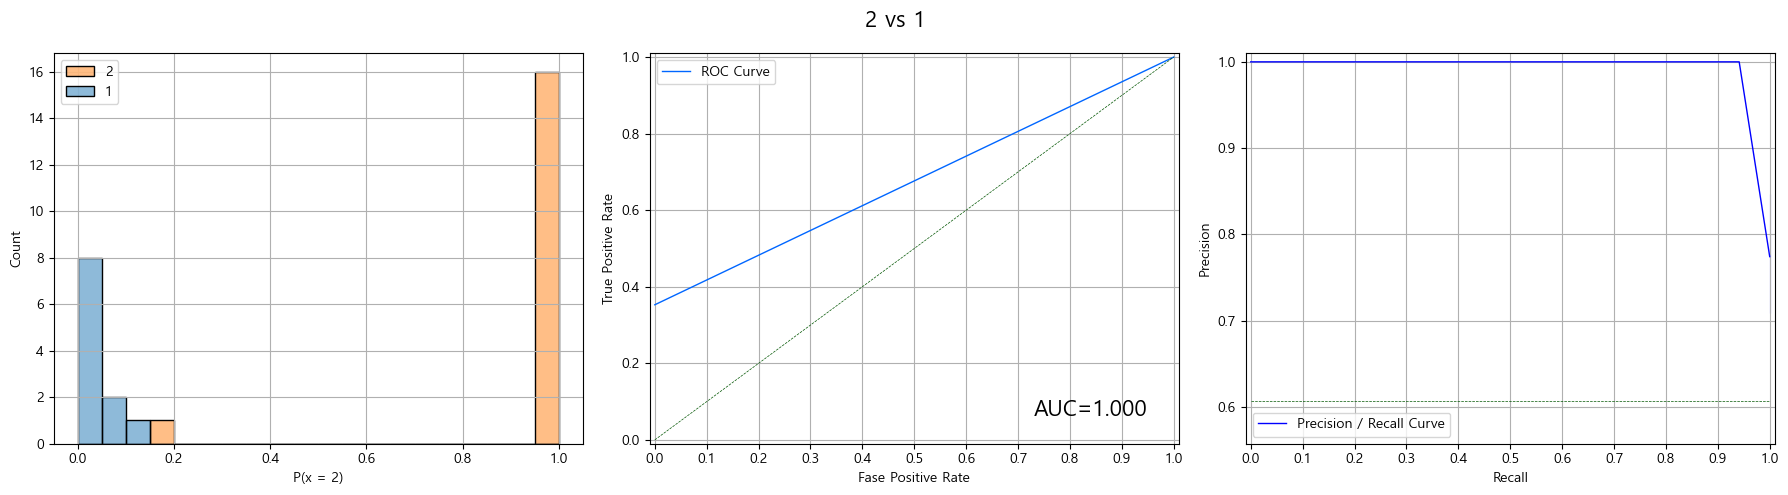

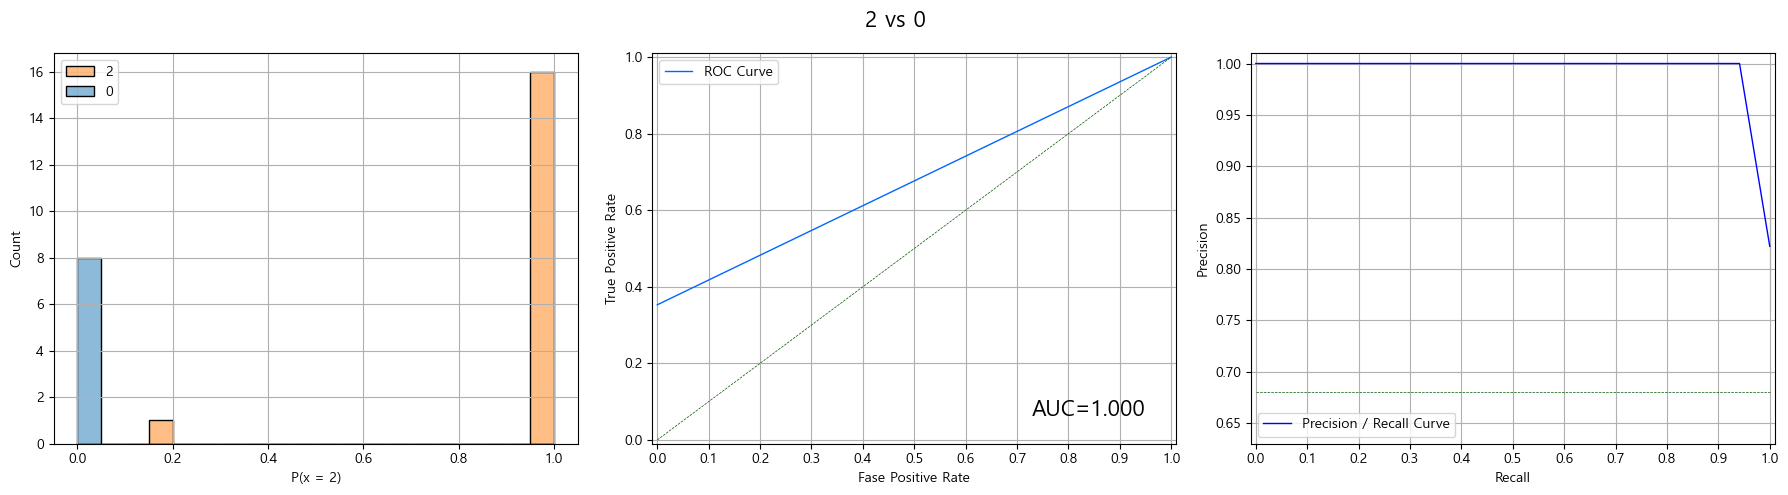

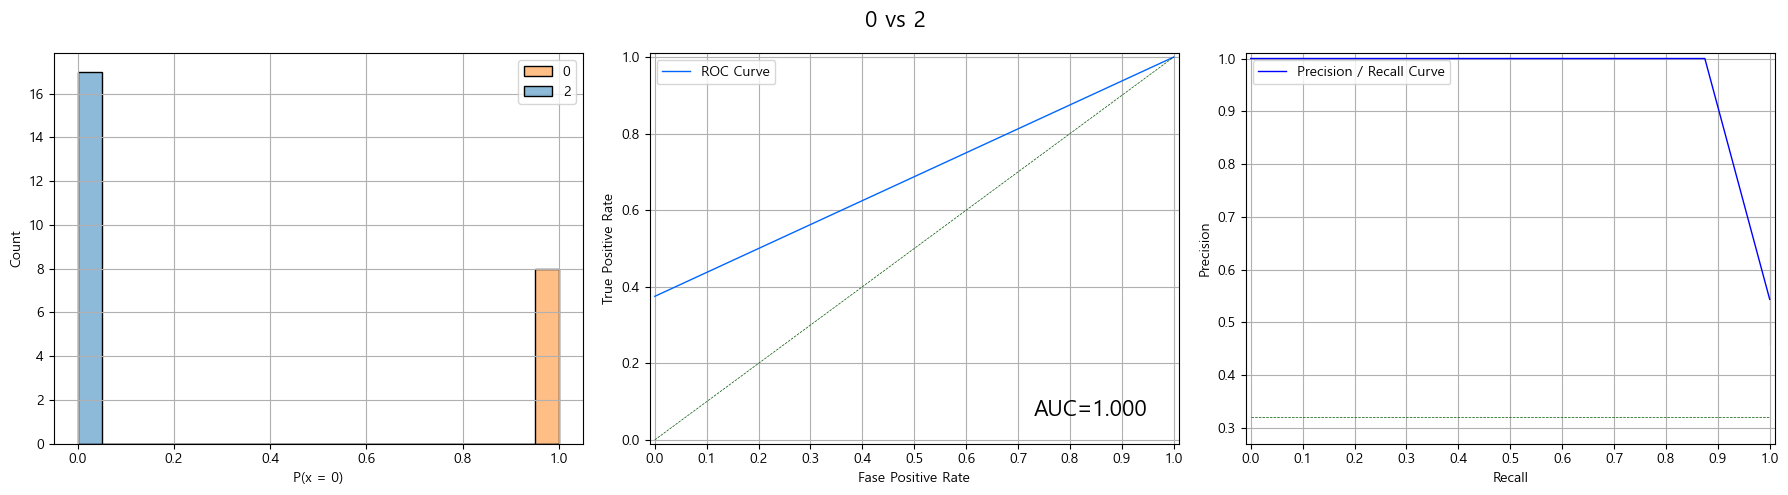

mean roc auc ovo: 1.0000


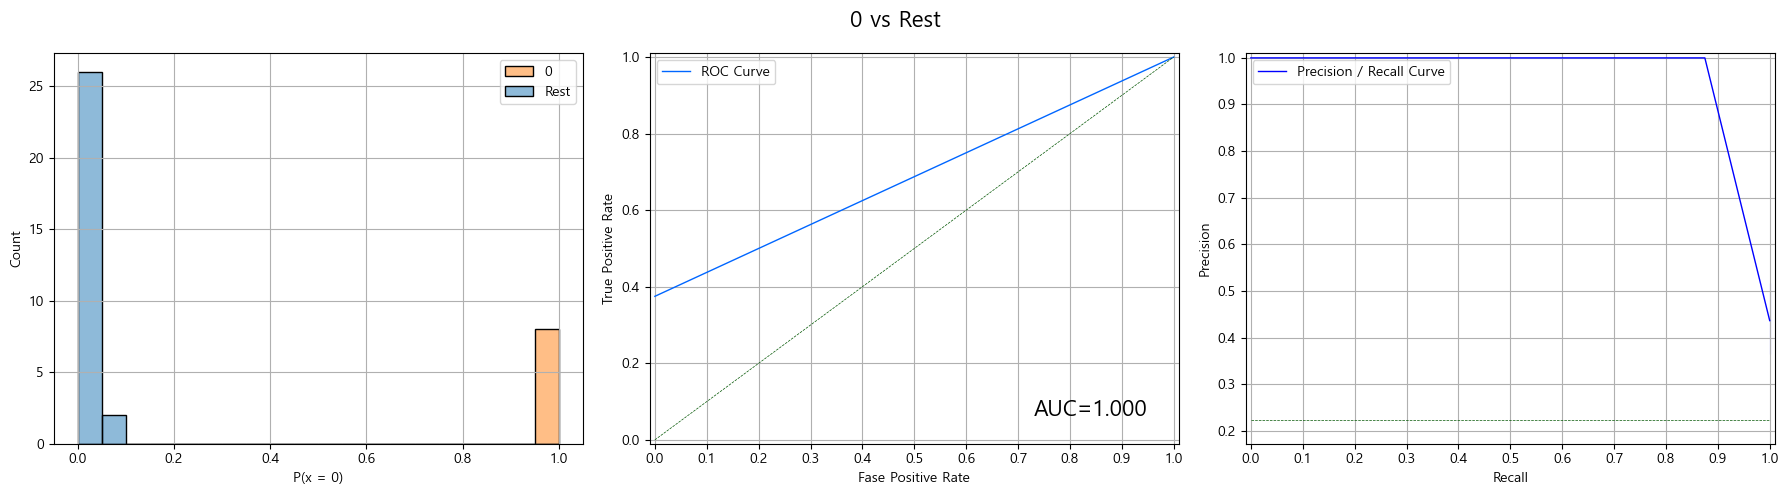

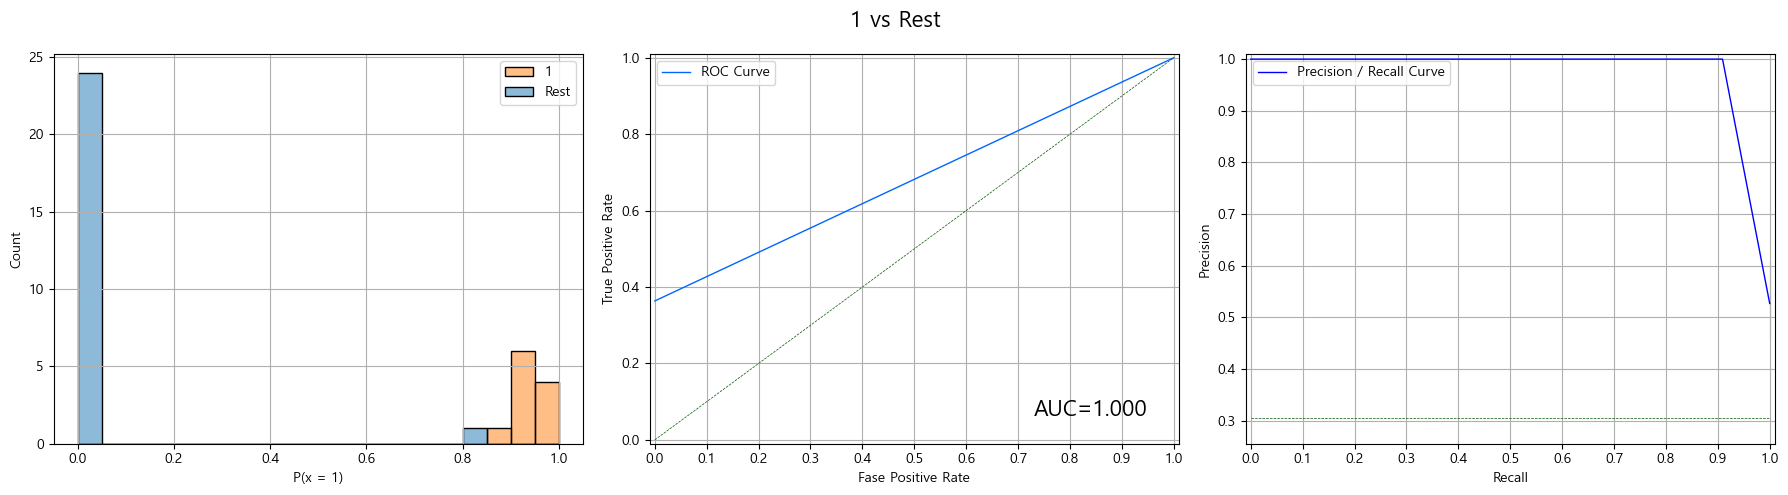

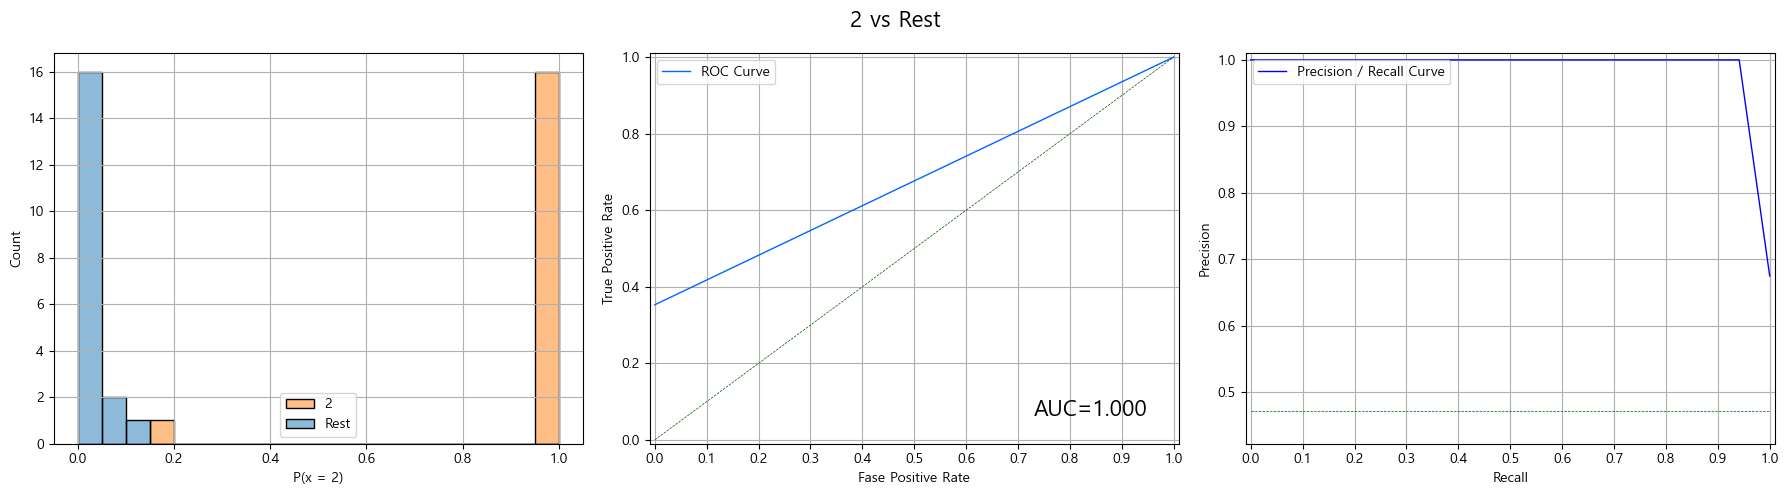

mean roc auc ovo: 1.0000

[학습곡선]


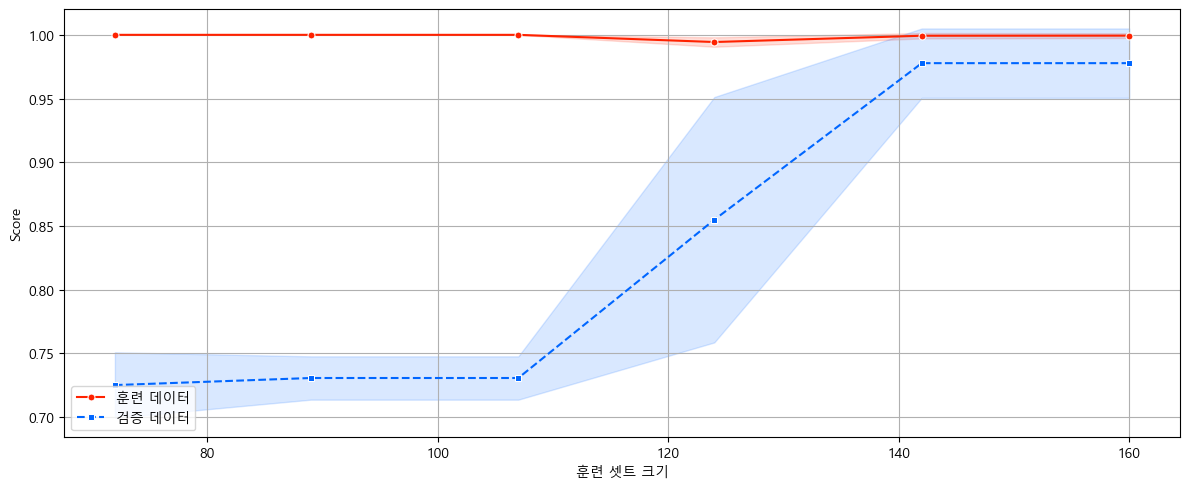

In [13]:
my_classification_result(estimator, x_train, y_train, x_test, y_test)